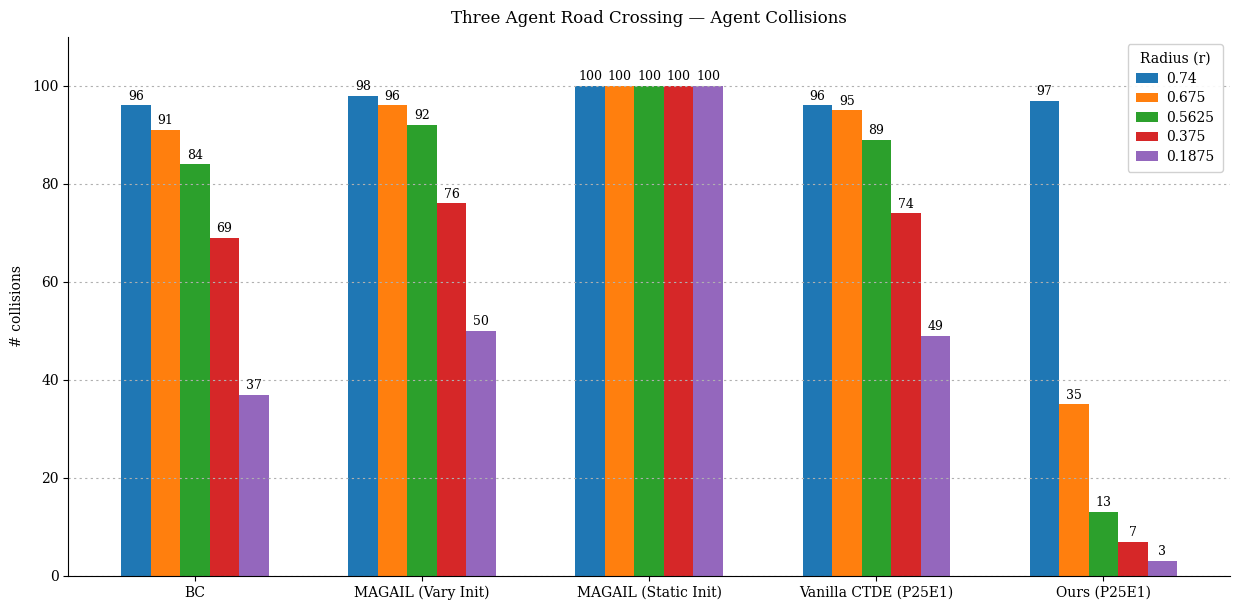

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator

# ---------- Global style (Palatino + clean look) ----------
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Palatino", "Palatino Linotype", "Book Antiqua",
                   "URW Palladio L", "TeX Gyre Pagella", "DejaVu Serif"],
    "axes.unicode_minus": False,
})

# ---------- Order from your UPDATED table ----------
methods = [
    "BC",
    "MAGAIL (Vary Init)",
    "MAGAIL (Static Init)",
    "Vanilla CTDE (P25E1)",
    "Ours (P25E1)",
]

radii = [0.74, 0.675, 0.5625, 0.375, 0.1875]

# ---------- Data from the UPDATED table ----------
edge_data = {
    "0": {  # 0 Edge Ignore
        "BC":                       [96, 91, 84, 69, 37],
        "MAGAIL (Vary Init)":       [98, 96, 92, 76, 50],
        "MAGAIL (Static Init)":     [100, 100, 100, 100, 100],
        "Vanilla CTDE (P25E1)":     [96, 95, 89, 74, 49],
        "Ours (P25E1)":             [97, 35, 13,  7,  3],
    },
    "5": {  # 5 Edge Ignore
        "BC":                       [96, 91, 84, 69, 37],
        "MAGAIL (Vary Init)":       [98, 96, 92, 76, 50],
        "MAGAIL (Static Init)":     [100, 100, 100, 100, 100],
        "Vanilla CTDE (P25E1)":     [96, 95, 89, 73, 49],
        "Ours (P25E1)":             [97, 34, 13,  7,  3],
    },
    "10": {  # 10 Edge Ignore
        "BC":                       [96, 91, 84, 69, 37],
        "MAGAIL (Vary Init)":       [98, 96, 92, 76, 50],
        "MAGAIL (Static Init)":     [100, 100, 100, 100, 100],
        "Vanilla CTDE (P25E1)":     [96, 95, 89, 73, 48],
        "Ours (P25E1)":             [97, 33, 12,  6,  2],
    },
}

def plot_three_agent_agent_collisions(edge_ignore="0", save=False):
    """
    Grouped bar chart for a chosen Edge Ignore setting ("0", "5", or "10").
    X-axis: methods (in updated-table order). Bars: radii. Legend: top-right.
    """
    if edge_ignore not in edge_data:
        raise ValueError("edge_ignore must be one of {'0','5','10'}")

    data_for_edge = edge_data[edge_ignore]
    df = pd.DataFrame([data_for_edge[m] for m in methods], index=methods, columns=radii)

    x = np.arange(len(methods))
    width = 0.13  # five bars per group -> slightly narrow
    offsets = np.linspace(-2, 2, len(radii)) * width

    fig, ax = plt.subplots(figsize=(12.5, 6.2))

    containers = []
    for j, r in enumerate(radii):
        bars = ax.bar(x + offsets[j], df[r].values, width, label=f"{r}")
        containers.append(bars)

    ax.set_title(f"Three Agent Road Crossing — Agent Collisions", pad=10)
    ax.set_ylabel("# collisions", labelpad=6)
    ax.set_ylim(0, max(df.values.ravel()) * 1.1)

    # Horizontal labels (no slant)
    ax.set_xticks(x)
    ax.set_xticklabels(methods, rotation=0, ha="center")

    # Clean + gentle grid
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(axis="y", linestyle=(0, (2, 3)), linewidth=0.8)
    ax.yaxis.set_major_locator(MultipleLocator(20))

    # Legend: top-right, tidy box
    ax.legend(
        loc="upper right",
        frameon=True, fancybox=True, framealpha=0.9, edgecolor="0.8",
        title="Radius (r)", title_fontsize=10, fontsize=10,
        handlelength=1.6, handletextpad=0.6, borderpad=0.6, labelspacing=0.4
    )

    for container in containers:
        ax.bar_label(container, padding=2, fontsize=9)

    fig.tight_layout()

    if save:
        base = f"three_agent_agent_collisions_edge{edge_ignore}_ordered"
        plt.savefig(f"{base}.png", dpi=300, bbox_inches="tight")
        plt.savefig(f"{base}.pdf", bbox_inches="tight")

    plt.show()

# Examples:
plot_three_agent_agent_collisions("0")
# plot_three_agent_agent_collisions("5")
# plot_three_agent_a_
